In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import networkx as nx
from networkx.algorithms import community
plt.interactive(False)

In [2]:
data = pd.read_csv("ASIF_changed.txt", sep="\t")
# oft Leerzeichen statt /t deswegen alle Leerzeichen durch /t ersetzt
# Zeile mit "Craster'sWife1(Oathkeeper)"	NA	NA gelöscht

In [3]:
# überprüfen, ob NA Werte im File noch vorhanden sind
#nan_rows = data[data['type'].isnull()]
#nan_rows

In [4]:
houses = ["Baratheon", "Lannister", "Stark", "Targaryen", "Tully", "Frey", "Greyjoy", "Martell", "Tyrell"]
colors = ["green", "red", "blue", "grey", "purple", "pink", "brown", "yellow", "orange"]
relation_types = ["allegiance", "father", "mother", "spouse"]
relation_colors = ["r", "b", "g", "y"]
data = data.loc[data['type'].isin(relation_types)]

In [5]:
data_houses = dict()
for house in houses:
    data_houses[house] = data.loc[data['name'].str.contains(house)]
plt.figure(figsize=(32, 24))
G = nx.Graph()

<Figure size 2304x1728 with 0 Axes>

In [6]:
labels = {}
node_color_map = []
color_map = dict(zip(houses, colors))
rel_color_map = dict(zip(relation_types, relation_colors))
G.add_nodes_from(data.name.unique())
G.add_nodes_from(data.attr.unique())

In [7]:
#Farbe ist weiß, wenn Person keinem Haus zugeordnet werden kann. Labels sind dann besser lesbar als bei z.B. schwarz.
for name in G:
    color = 'white'
    for house in houses:
        if house in name:
            color = color_map[house]
            break
    G.add_node(name)
    labels.update({name: name})
    node_color_map.append(color)

In [8]:
for index, row in data.iterrows():
    G.add_edge(row["name"], row["attr"], color=rel_color_map[row['type']])
nodes = G.nodes()
edges = G.edges()
edge_color_map = [G[u][v]['color'] for u, v in edges]

In [9]:
pos = nx.kamada_kawai_layout(G)
#pos = nx.draw_spring(G) diverse andere Layouts probiert.

C:\Users\Christian\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


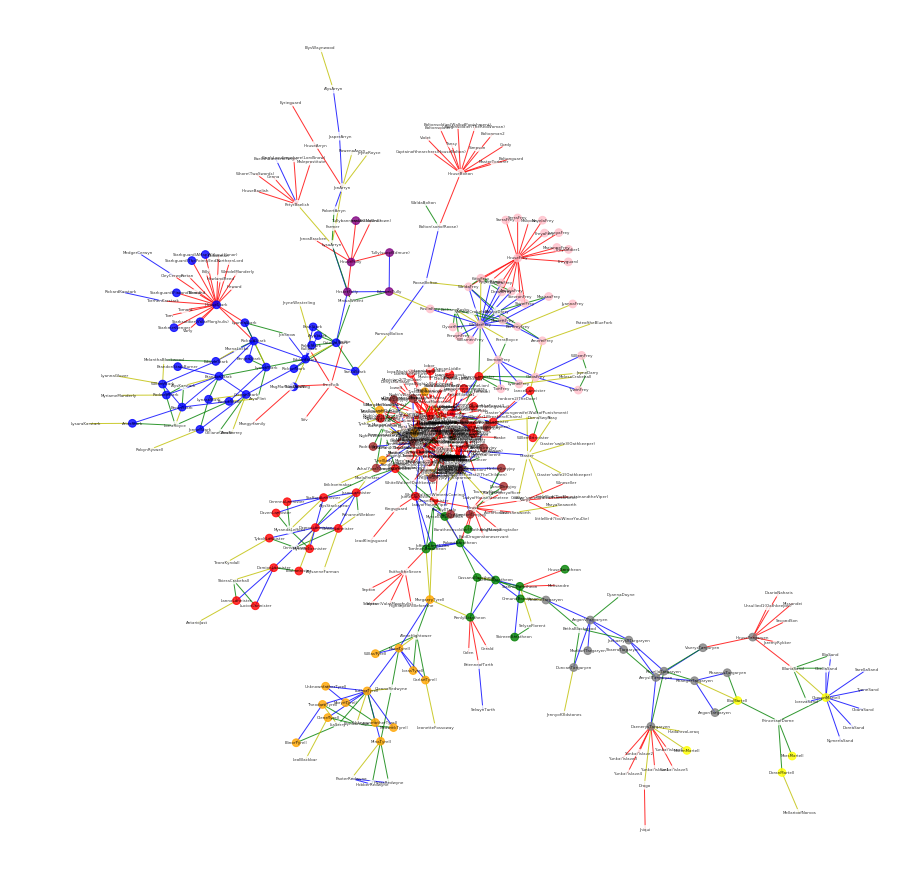

In [10]:
plt.figure(1,figsize=(12,12))
ec = nx.draw(G, pos, nodes=nodes, node_color=node_color_map, edges=edges, edge_color=edge_color_map, node_size=60, font_size= 4, alpha=0.8, with_labels=True)
plt.savefig("plot.png", dpi=1000)
plt.show()
#Auflösung nicht gut genug, deswegen muss es als Bild gespeichert werden

In [11]:
#Wichtigste Knoten im Netzwerk: Eigenvector, berechnet centrality auf Grund der centrality der Nachbarn.
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:7]

[('WalderFrey', 0.5292602936943966),
 ('HouseFrey', 0.3288289853080628),
 ('KittyFrey', 0.275129644289123),
 ('WaldaFrey', 0.2568088087290549),
 ('MerrettFrey', 0.20060135574588892),
 ('ArwayaFrey', 0.18627919288739594),
 ('DerwaFrey', 0.18627919288739594)]

In [12]:
#Andere centrality, auf Grund der Distanz des Knoten zu seinen Nachbarn.
close = nx.closeness_centrality(G)
sorted(close.items(), key=lambda x:x[1], reverse=True)[0:7]

[('TywinLannister', 0.09848484848484848),
 ('JoannaLannister', 0.09652128764278296),
 ('TyrionLannister', 0.09545081125487778),
 ('CerseiLannister', 0.09527470274702747),
 ('SansaStark', 0.09326710816777041),
 ('JaimeLannister', 0.09091353677621283),
 ('JeyneMarbrand', 0.08923771121351766)]

In [13]:
#Communities:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['AddamMarbrand', 'HouseMarbrand'],
 ['AdrackHumble', 'HouseHumble'],
 ['AegonTargaryen',
  'AegonVTargaryen',
  'AerysIITargaryen',
  'BethaBlackwood',
  'DaarioNaharis',
  'DaenerysTargaryen',
  'DoranMartell',
  'DoreaSand',
  'Drogo',
  'DuncanTargaryen',
  'DyannaDayne',
  'EliaMartell',
  'EliaSand',
  'EllariaSand',
  'HizdahrzoLoraq',
  'HouseTargaryen',
  'JaehaerysIITargaryen',
  'JaremyRykker',
  'JennyofOldstones',
  'Jhiqui',
  'LorezaSand',
  'MaekarITargaryen',
  'MaronMartell',
  'MellarioofNorvos',
  'Missandei',
  'MorsMartell',
  'NymeriaSand',
  'ObaraSand',
  'ObellaSand',
  'OberynMartell',
  'OrmundBaratheon',
  'PrincessofDorne',
  'RhaegarTargaryen',
  'RhaellaTargaryen',
  'RhaelleTargaryen',
  'RhaenysTargaryen',
  'SarellaSand',
  'SecondSon',
  'ShaeraTargaryen',
  'TyeneSand',
  'Unsullied1(Oathkeeper)',
  'ViserysTargaryen',
  "Yunkai'islave1",
  "Yunkai'islave2",
  "Yunkai'islave3",
  "Yunkai'islave4",
  "Yunkai'islave5",
  "Yunkai'islave6"],
 ['AeronGr